<a href="https://colab.research.google.com/github/Pager07/TensorflowSpecialization/blob/master/C2W1-EvalutaingAccAndLoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Downloading Data


In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-07-24 12:47:52--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.218.128, 108.177.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  95.9MB/s    in 0.7s    

2020-07-24 12:47:53 (95.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os 
import zipfile
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zipRef= zipfile.ZipFile(local_zip,'r')
zipRef.extractall('/tmp')
zipRef.close()


In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [5]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.322.jpg', 'cat.197.jpg', 'cat.841.jpg', 'cat.879.jpg', 'cat.938.jpg', 'cat.443.jpg', 'cat.342.jpg', 'cat.729.jpg', 'cat.971.jpg', 'cat.499.jpg']
['dog.129.jpg', 'dog.64.jpg', 'dog.869.jpg', 'dog.785.jpg', 'dog.995.jpg', 'dog.123.jpg', 'dog.282.jpg', 'dog.571.jpg', 'dog.7.jpg', 'dog.468.jpg']


In [6]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


#Looking at Data

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

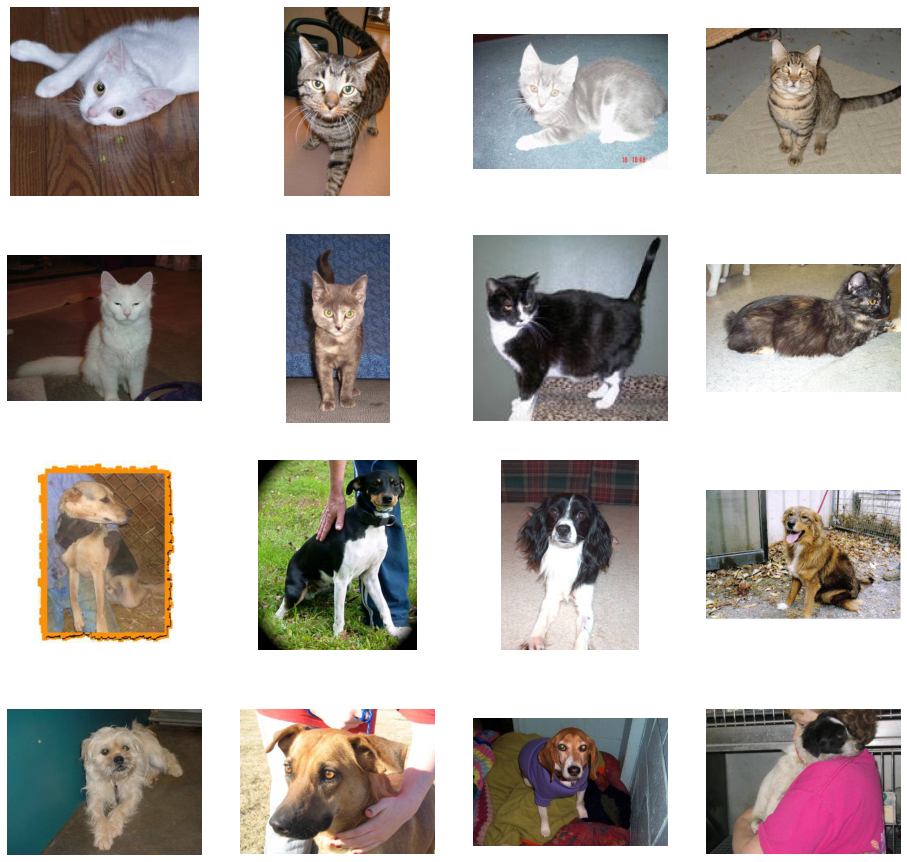

In [8]:
#Get figure object
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows *4)
#Get directory of images
pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fn) for fn in train_cat_fnames[pic_index-8 : pic_index]] 
next_dog_pix =[os.path.join(train_dogs_dir,fn) for fn in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  #how do we put images to the fig object
  sp =plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')

  # load the images
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#Building Small Model

In [9]:
import tensorflow as tf


In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Conv2D(36,(3,3),activation='relu'),  
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),  
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=1 , activation='sigmoid')

])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 36)        5220      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        20800     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', 
              optimizer= RMSprop(lr=0.001),
              metrics = ['accuracy'])


#Data preprocessing 

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size  = 20, 
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#Training

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch = 20,
    epochs = 15, 
    validation_data = validation_generator,
    verbose = 2 
)

Epoch 1/15
20/20 - 5s - loss: 1.3007 - accuracy: 0.4950 - val_loss: 0.7175 - val_accuracy: 0.5000
Epoch 2/15
20/20 - 5s - loss: 0.7069 - accuracy: 0.5100 - val_loss: 0.6820 - val_accuracy: 0.6010
Epoch 3/15
20/20 - 5s - loss: 0.7012 - accuracy: 0.5400 - val_loss: 0.7250 - val_accuracy: 0.5020
Epoch 4/15
20/20 - 5s - loss: 0.6894 - accuracy: 0.5900 - val_loss: 0.6773 - val_accuracy: 0.5670
Epoch 5/15
20/20 - 5s - loss: 0.6844 - accuracy: 0.6400 - val_loss: 0.6695 - val_accuracy: 0.5660
Epoch 6/15
20/20 - 5s - loss: 0.6977 - accuracy: 0.6250 - val_loss: 0.6708 - val_accuracy: 0.5630
Epoch 7/15
20/20 - 5s - loss: 0.6177 - accuracy: 0.6600 - val_loss: 0.5960 - val_accuracy: 0.7010
Epoch 8/15
20/20 - 5s - loss: 0.6356 - accuracy: 0.6875 - val_loss: 0.6416 - val_accuracy: 0.6380
Epoch 9/15
20/20 - 5s - loss: 0.5633 - accuracy: 0.7075 - val_loss: 0.6047 - val_accuracy: 0.6710
Epoch 10/15
20/20 - 5s - loss: 0.6240 - accuracy: 0.6925 - val_loss: 0.6375 - val_accuracy: 0.6440
Epoch 11/15
20/20 -

#Inference on images

In [15]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Saving 00000504_003.jpg to 00000504_003.jpg
[0.]
00000504_003.jpg is a cat


#Visualizing Intermediate Representation

The brighter the region the higher the activation at that regions

(74, 74)
[[0.11083088 0.11176813 0.11305218 ... 0.20128125 0.2003848  0.19810039]
 [0.11083216 0.11221256 0.11537655 ... 0.20202363 0.20362213 0.20195746]
 [0.11740012 0.11439743 0.11525358 ... 0.20340979 0.20397446 0.20668933]
 ...
 [0.0332071  0.08969059 0.11713683 ... 0.09318959 0.0928613  0.07845186]
 [0.02901452 0.07301215 0.11267779 ... 0.09022991 0.07509124 0.08084858]
 [0.04091529 0.11749835 0.11389346 ... 0.07984723 0.09055444 0.107191  ]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


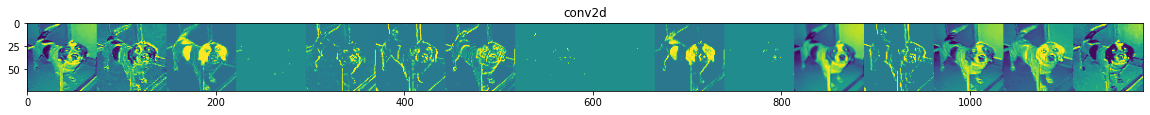

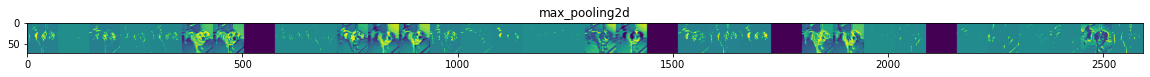

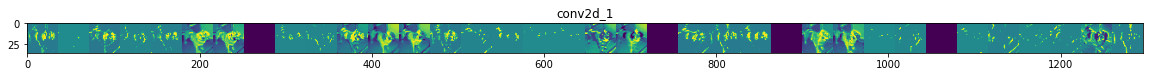

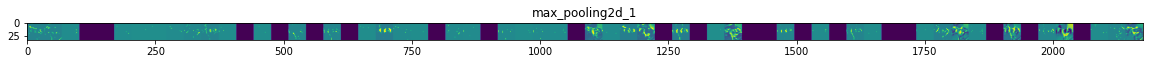

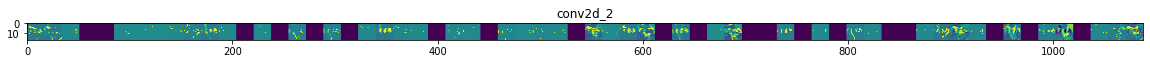

In [31]:
import numpy as np
import random 
from tensorflow.keras.preprocessing.image import img_to_array, load_img 
# Build a model that takes input and outputs activation for each layers
layers_activation = [layer.output for layer in model.layers[1:]]
activation_model = tf.keras.models.Model(inputs=model.input , outputs= layers_activation)

#Load random traning images
cat_img_files = [os.path.join(train_cats_dir,fn) for fn in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir,fn) for fn in train_dog_fnames]
img_path = random.choice(cat_img_files+dog_img_files)
img = load_img(img_path, target_size=(150,150)) #this is an PIL image object
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

#normalize the image 
x /=255.0

successive_feature_map = activation_model.predict(x)
layer_names = [layer.name for layer in model.layers]
count = 0
for layer_name,feature_map in zip(layer_names, successive_feature_map):
  if len(feature_map.shape) == 4:
    #tile the feature maps for a layer into a single image
    n_features  = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size*n_features))

    #postproces the feature to be visaully palatable
    for i in range(n_features):
      x = feature_map[0,:,:,i]
      if count == 0:
        print(x.shape)
        print(x)
      #Standardizse tha values: if you dont, then 
      x -= x.mean()
      x /= x.std()
      x *=64
      x += 128
      x = np.clip(x,0,255).astype('uint8')
      display_grid[:,i*size:(i+1)*size] = x 
      count += 1
    #Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale*n_features , scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto', cmap='viridis')





#Evaluation Accuracy and Loss for the Model

Text(0.5, 1.0, 'Training and Validation loss')

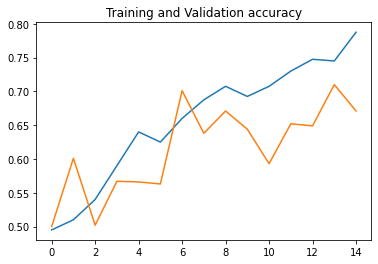

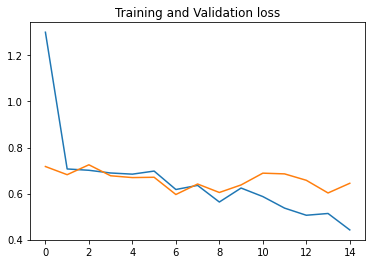

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and Validation accuracy')
plt.figure() #Creating a figure object for new graph
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and Validation loss')
